# Capstone project EDA

### By Victor Ramirez

In [ ]:
# Import the libraries we'll use below.

# standard
import pandas as pd
import numpy as np
import random
import os

# tf and keras
import math
import tensorflow as tf
from sklearn import preprocessing
from tensorflow import keras
from keras import models
from keras import layers

# plots
import seaborn as sns  # for nicer plots
import matplotlib.pyplot as plt

sns.set(style="darkgrid")  # default style
import plotly.express as px

from scipy import stats # For in-built method to get PCC

random.seed(2)
%matplotlib inline

## Understanding the data

Before doing any training (or evaluating), let's make sure we understand what we're working with. 

### Load the data

We'll only use a few of the columns.

In [10]:
# Load the data from a CSV file into a pandas dataframe. Remember that each row
# is an example and each column in a feature.
fbi_data = pd.read_csv(
    # 'F:/code/uc berkeley/mids-210/datasciw210/EDA/fbi_hatecrime_census_bea.csv',
    '/Users/RamirezV/Documents/GitHub/uc berkeley/210/datasciw210/EDA/fbi_hatecrime_census_bea.csv',
    sep=',', encoding='latin-1')

sf_data = pd.read_csv(
    #'F:/code/uc berkeley/mids-210/datasciw210/EDA/Police_Department_Incident_Reports__2018_to_Present.csv'
    '/Users/RamirezV/Documents/GitHub/uc berkeley/210/datasciw210/EDA/Police_Department_Incident_Reports__2018_to_Present.csv'
)

# ca_data = pd.read_csv(
#     'F:/code/uc berkeley/mids-210/datasciw210/EDA/hci_crime_752_pl_co_re_ca_2000-2013_21oct15-ada.xlsx'
# )

# sf_data.drop(columns=['location'], inplace = True)


## Read data

In [11]:
# data EDA
print(sf_data.describe())

       Incident Year        Row ID   Incident ID  Incident Number  \
count  689374.000000  6.893740e+05  6.893740e+05     6.893740e+05   
mean     2019.952302  9.296570e+10  9.296568e+05     2.011150e+08   
std         1.473048  1.783620e+10  1.783620e+05     1.530273e+07   
min      2018.000000  6.186871e+10  6.186870e+05     0.000000e+00   
25%      2019.000000  7.753987e+10  7.753982e+05     1.901700e+08   
50%      2020.000000  9.292887e+10  9.292885e+05     2.003624e+08   
75%      2021.000000  1.083724e+11  1.083724e+06     2.108149e+08   
max      2023.000000  1.239496e+11  1.239496e+06     9.814243e+08   

         CAD Number  Incident Code           CNN  Supervisor District  \
count  5.349460e+05  689374.000000  6.527470e+05        652747.000000   
mean   2.020317e+08   24601.433123  2.532118e+07             5.964844   
std    2.374606e+07   25645.167152  3.093394e+06             2.808055   
min    1.000000e+00    1000.000000  2.001300e+07             1.000000   
25%    1.9065

In [12]:

print(sf_data.describe())

       Incident Year        Row ID   Incident ID  Incident Number  \
count  689374.000000  6.893740e+05  6.893740e+05     6.893740e+05   
mean     2019.952302  9.296570e+10  9.296568e+05     2.011150e+08   
std         1.473048  1.783620e+10  1.783620e+05     1.530273e+07   
min      2018.000000  6.186871e+10  6.186870e+05     0.000000e+00   
25%      2019.000000  7.753987e+10  7.753982e+05     1.901700e+08   
50%      2020.000000  9.292887e+10  9.292885e+05     2.003624e+08   
75%      2021.000000  1.083724e+11  1.083724e+06     2.108149e+08   
max      2023.000000  1.239496e+11  1.239496e+06     9.814243e+08   

         CAD Number  Incident Code           CNN  Supervisor District  \
count  5.349460e+05  689374.000000  6.527470e+05        652747.000000   
mean   2.020317e+08   24601.433123  2.532118e+07             5.964844   
std    2.374606e+07   25645.167152  3.093394e+06             2.808055   
min    1.000000e+00    1000.000000  2.001300e+07             1.000000   
25%    1.9065

In [ ]:
# data cleaning

# check for null values
print(sf_data.isnull().sum())

columns = sf_data.columns
##################
### DROP zeros ###
##################
for col in columns:
    if (sf_data[col] == 0).all():
        print('All values in ', col ,' column are zero dropping col')
        del sf_data[col]
    else:
        print('All values in ', col ,' column are not zero')
    

print('Number of features: %s' %sf_data.shape[1])
print('Number of examples: %s' %sf_data.shape[0])

# print('Number of location', len(pd.unique(sf_data['location'])))

# Find unique values of a column
# print(sf_data['location'].unique())

print(sf_data.columns.tolist())

print('Columns in my data: ', sf_data.columns.tolist())


In [ ]:
# data cleaning

# check for null values
print(fbi_data.isnull().sum())

columns = fbi_data.columns
##################
### DROP zeros ###
##################
for col in columns:
    if (fbi_data[col] == 0).all():
        print('All values in ', col ,' column are zero dropping col')
        del fbi_data[col]
    else:
        print('All values in ', col ,' column are not zero')
    

print('Number of features: %s' %fbi_data.shape[1])
print('Number of examples: %s' %fbi_data.shape[0])

print('Number of location', len(pd.unique(fbi_data['location'])))

# Find unique values of a column
print(fbi_data['location'].unique())

print(fbi_data.columns.tolist())

print('Columns in my data: ', fbi_data.columns.tolist())


In [ ]:
# shuffle order
indices = np.arange(hc.shape[0])
print('indices:', indices, '\n')

# set seed
np.random.seed(0)
shuffled_indices = np.random.permutation(indices)
print('shuffled indices:', shuffled_indices, '\n')

# reindex to change the ordering of the original
hc = hc.reindex(shuffled_indices)
display(hc)


## Visual EDA

In [ ]:
# visual hate_crime_incident_count summary in a treemap plot

# fig = px.treemap(fbi_data, path=[px.Constant("hate_crime_incident_count EDA"), 'location', 'year', 'month'], 
                 # values='hate_crime_incident_count')
# fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
# fig.show()

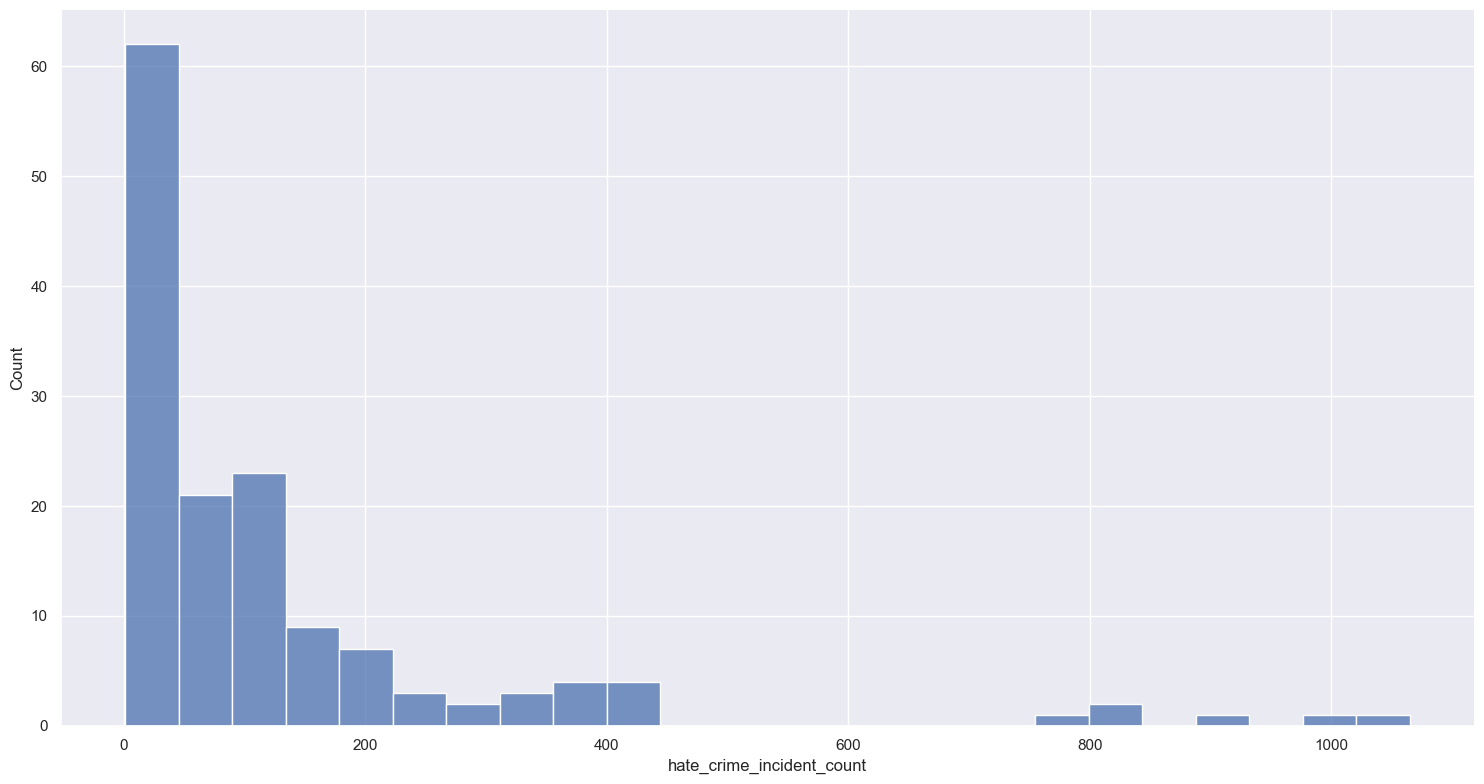

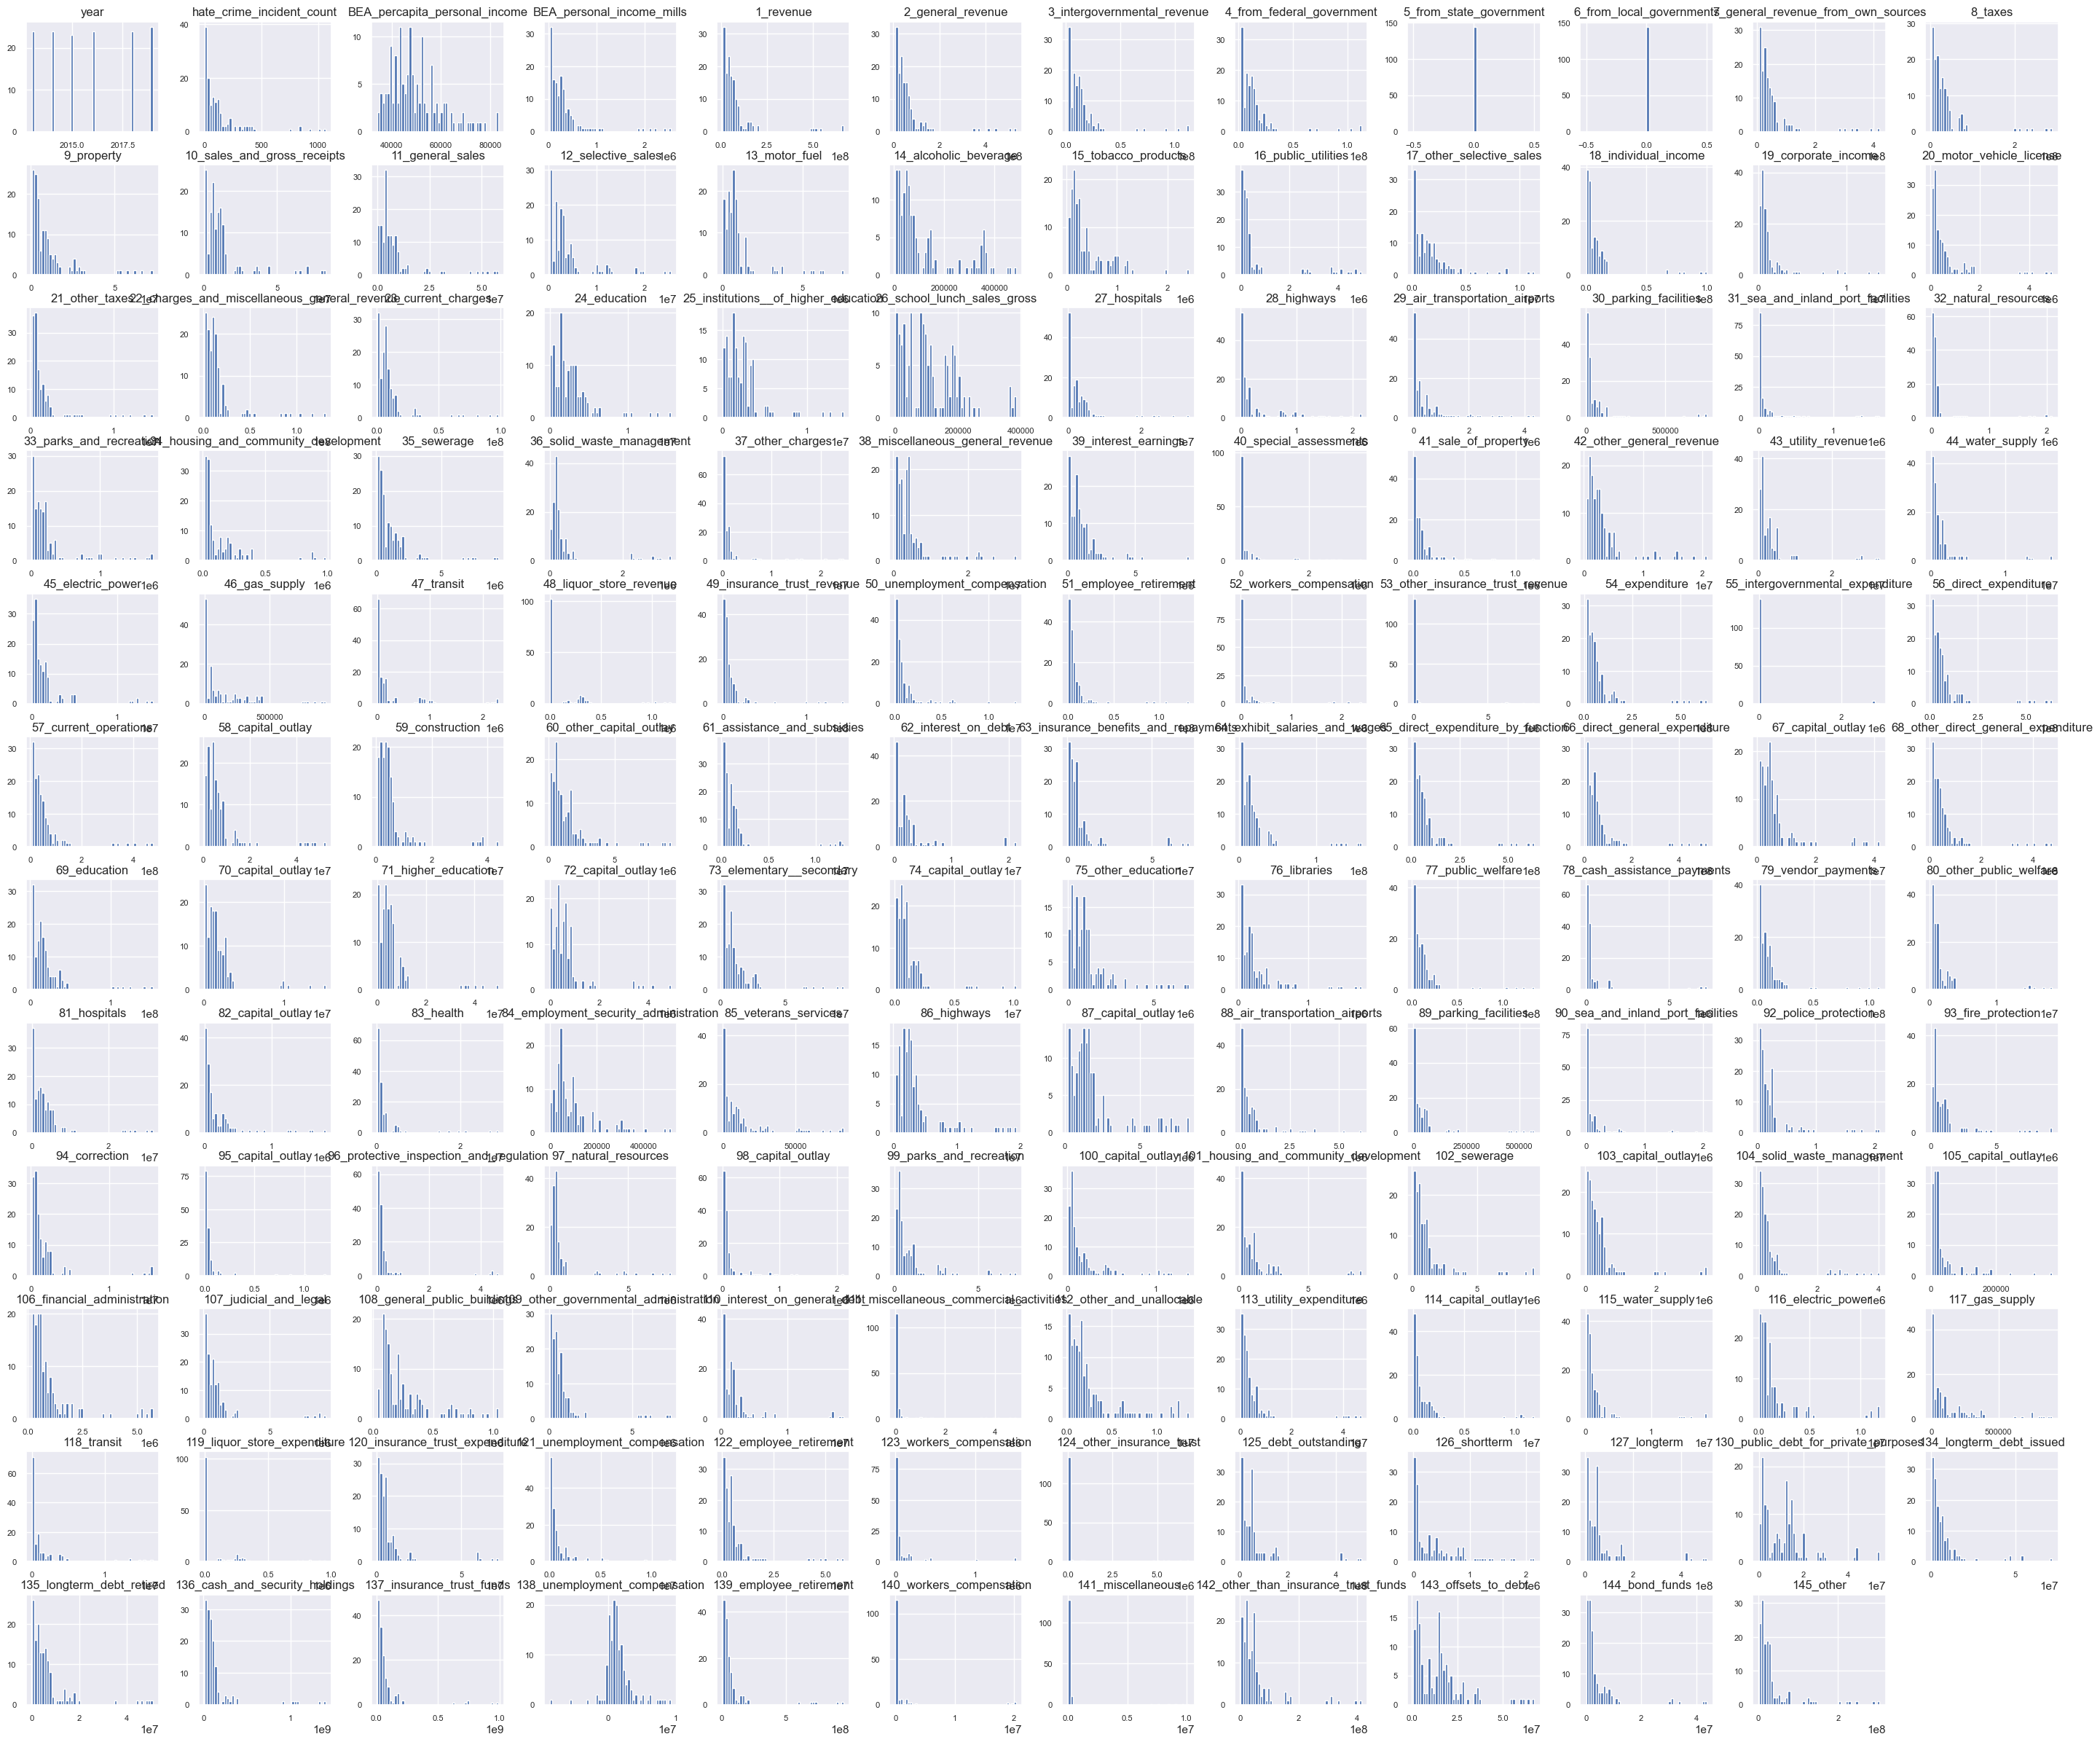

In [13]:
# visual EDA 

#plot the histogram of hate_crime_incident_count to see the distribution of the point data
sns.displot(fbi_data, x="hate_crime_incident_count", height=8, aspect=15/8)

#plot the histogram of all features to see the distribution of the point data
fbi_data.hist(figsize=(36, 30), bins=50, xlabelsize=8, ylabelsize=8);


## Correlation EDA

In [ ]:
# correlation EDA
core_value = 0.83

df_num_corr = bea.corr()['hate_crime_incident_count']
# create a golden list of high correlation features values
golden_features_list = df_num_corr[abs(df_num_corr) > core_value].sort_values(ascending=False)
print("There are {} strongly correlated values with a greater than 0.83 correlation with the hate_crime_incident_count:\n{}".format(len(golden_features_list), golden_features_list))

# create a golden list of high correlation features labels
quantitative_features_list = ['72_capital_outlay', '80_other_public_welfare', '18_individual_income', '71_higher_education', '77_public_welfare', '101_housing_and_community_development', '83_health',
    '3_intergovernmental_revenue', '4_from_federal_government', '96_protective_inspection_and_regulation', '114_capital_outlay', '61_assistance_and_subsidies', '70_capital_outlay', '107_judicial_and_legal',
    '63_insurance_benefits_and_repayments', '120_insurance_trust_expenditure', '113_utility_expenditure', '79_vendor_payments']

# By convention, when the
# p-value is  <  0.001: we say there is strong evidence that the correlation is significant.
# the p-value is  <  0.05: there is moderate evidence that the correlation is significant.
# the p-value is  <  0.1: there is weak evidence that the correlation is significant.
# the p-value is  >  0.1: there is no evidence that the correlation is significant.

for x in quantitative_features_list:
    pearson_coef, p_value = stats.pearsonr(bea[x], bea['hate_crime_incident_count'])
    print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)      
    
    
# we will use these input features
features = []

for i in range(0,len(hc.columns)):
  feature_add = hc.columns[i]
  features.append(feature_add)

features.remove('hate_crime_incident_count')
print(features)
len(features)


In [ ]:
fbi_data.info()

In [ ]:
# more EDA 
# display all the correlated values to find outliers

for i in range(0, len(fbi_data.columns), 5):
    sns.pairplot(data=fbi_data,
                x_vars=fbi_data.columns[i:i+5],
                y_vars=['hate_crime_incident_count'])

In [ ]:
# more correlation EDA 

corr = fbi_data.drop('hate_crime_incident_count', axis=1).corr() 
plt.figure(figsize=(50, 50))

# viridis color
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);


### Feature selection

In [ ]:
#  quantitative features of our dataframe and how they relate to the hate_crime_incident_count
quantitative_features_list = ['72_capital_outlay', '80_other_public_welfare', '18_individual_income', '71_higher_education', '77_public_welfare', '101_housing_and_community_development', '83_health',
    '3_intergovernmental_revenue', '4_from_federal_government', '96_protective_inspection_and_regulation', '114_capital_outlay', '61_assistance_and_subsidies', '70_capital_outlay', '107_judicial_and_legal',
    '63_insurance_benefits_and_repayments', '120_insurance_trust_expenditure', '113_utility_expenditure', '79_vendor_payments']

df_quantitative_values = fbi_data[quantitative_features_list]

features_to_analyse = [x for x in quantitative_features_list if x in golden_features_list]

features_to_analyse.append('hate_crime_incident_count')

print(features_to_analyse)


In [ ]:
#  plot quantitative features of our dataframe and how they relate to the hate_crime_incident_count
fig, ax = plt.subplots(round(len(features_to_analyse) / 3), 3, figsize = (30, 30))

for i, ax in enumerate(fig.axes):
    if i < len(features_to_analyse) - 1:
        sns.regplot(x=features_to_analyse[i],y='hate_crime_incident_count', data=fbi_data[features_to_analyse], ax=ax)

### Train/Test split

## Model

``Build model``

### Build and Train a Model